In [1]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time
from orbithunter.gluing import tile_dictionary_ks

In [2]:
from orbithunter.convolutional_neural_networks import orbit_cnn

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1286: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  _pywrap_tensorflow.RegisterType("Mapping", _collections.Mapping)
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1287: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  _pywrap_tensorflow.RegisterType("Sequence", _collections.Sequence)
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [3]:
td = tile_dictionary_ks(padded=False)

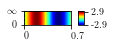

In [4]:
td[0].plot()

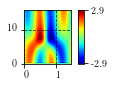

In [5]:
td[1].plot()

In [9]:
64*(td[1].T / td[2].T)

59.183923705603554

In [5]:
def generate_symbol_arrays(tile_dictionary, glue_shape, unique=True):
    symbol_arrays = [np.reshape(x, glue_shape) for x in list(itertools.product(list(tile_dictionary.keys()),
                                                                               repeat=np.product(glue_shape)))]
    if unique:
        axes = tuple(range(len(glue_shape)))
        cumulative_equivariants = []
        unique_symbol_arrays = []
        for symbol_combination in symbol_arrays:
            for rotation in itertools.product(*(list(range(a)) for a in glue_shape)):
                equivariant_combination = to_symbol_string(np.roll(symbol_combination, rotation, axis=axes))
                if equivariant_combination in cumulative_equivariants:
                    break
                else:
                    cumulative_equivariants.append(equivariant_combination)
            else:
                unique_symbol_arrays.append(symbol_combination)
        return unique_symbol_arrays
    else:
        return symbol_arrays

In [6]:
def to_symbol_string(symbol_array):
    symbolic_string = symbol_array.astype(str).copy()
    shape_of_axes_to_contract = symbol_array.shape[1:]
    for i, shp in enumerate(shape_of_axes_to_contract):
        symbolic_string = [(i*'_').join(list_) for list_ in np.array(symbolic_string).reshape(-1, shp).tolist()]
    symbolic_string = ((len(shape_of_axes_to_contract))*'_').join(symbolic_string)
    return symbolic_string

In [7]:

def rediscretize_tiling_dictionary(tiling_dictionary, parameter_based=True, **kwargs):
    orbits = list(tiling_dictionary.values())
    n_dimensions = len(orbits[0].dimensions)
    if kwargs.get('new_shape', None) is None:
        if parameter_based:
            average_dimensions = [np.mean(x) for x in tuple(zip(*(o.dimensions for o in orbits)))]
            new_shape = _parameter_based_discretization(average_dimensions, **kwargs)
        else:
            new_shape = tuple(2*(np.mean([o.field_shape[i] for o in orbits]).astype(int)//2)
                              for i in range(n_dimensions))
    else:
        new_shape = kwargs.get('new_shape', None)
        
    return {td_key: rediscretize(td_val, new_shape=new_shape) for td_key, td_val in tiling_dictionary.items()}

In [8]:
import itertools

In [9]:
glue_shape = (2, 2)

In [47]:
np.random.seed(42)
symbol_array = (3*np.random.rand(17, 13)).astype(int)
gluing_shape = symbol_array.shape
glue_shape = symbol_array.shape
gluing_order = np.argsort(glue_shape)
gluing_order = (1, 0)

td =  tile_dictionary_ks()
orbit_array = np.array([rediscretize(td[symbol], new_shape=(8,8)).convert(to='field') 
                        for symbol in symbol_array.ravel()]).reshape(*symbol_array.shape)

NameError: name 'tile_dictionary_ks' is not defined

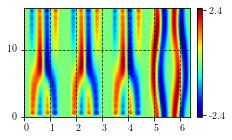

In [23]:
tiling.rescale(2.5).plot()

In [21]:
tiling = rediscretize(tile(np.array([[1,1,1,2]]), td, OrbitKS), new_shape=(32, 64))

In [24]:
gd_result = converge(tiling.rescale(2.5), method='gradient_descent', verbose=True)

Starting gradient descent. Initial residual=3101.6730609616643, target=2.048e-06, max_iter=32768
########## Residual=4.165392295017746 after 3276 gradient descent iterations
########## Residual=3.0015120044516888 after 6552 gradient descent iterations
########## Residual=2.3986387142407475 after 9828 gradient descent iterations
########## Residual=1.8546123242551231 after 13104 gradient descent iterations
########## Residual=1.3920575463650553 after 16380 gradient descent iterations
########## Residual=1.0809578330077985 after 19656 gradient descent iterations
########## Residual=0.905307481029799 after 22932 gradient descent iterations
########## Residual=0.8036722933164104 after 26208 gradient descent iterations
########## Residual=0.7379233093179067 after 29484 gradient descent iterations
########## Residual=0.6902630708362936 after 32760 gradient descent iterations

Failed to converge. Maximum number of iterations reached. exiting with residual 0.6901602719880564


In [27]:
result = converge(gd_result.orbit, method='lstsq',verbose=True)

Starting lstsq. Initial residual=0.6901602719880564, target=2.048e-06
5556666555554555555566777Residual=0.42334870123243273 after 25 lstsq iterations
7777666666665555444555555Residual=0.2539342810925957 after 50 lstsq iterations
5555666666666667777777788Residual=0.19066592365342547 after 75 lstsq iterations
88
Failed to converge. Exiting with residual 0.1900414542091256


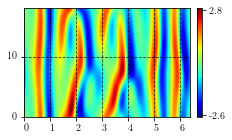

In [26]:
gd_result.orbit.plot()

In [11]:
# td = rediscretize_tiling_dictionary(td, new_shape=(16, 16))

In [17]:
unique_symbol_arrays = generate_symbol_arrays(td, glue_shape, unique=True)

In [13]:
from collections import Counter

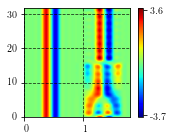

Starting gradient descent. Initial residual=1140169.7135389762, target=1.024e-06, max_iter=16384
########## Residual=88.82432351484556 after 1638 gradient descent iterations
########## Residual=39.34253398117448 after 3276 gradient descent iterations
########## Residual=20.64217417980576 after 4914 gradient descent iterations
########## Residual=11.99554575517217 after 6552 gradient descent iterations
########## Residual=7.465138365444651 after 8190 gradient descent iterations
########## Residual=4.880062204865089 after 9828 gradient descent iterations
########## Residual=3.311344598858483 after 11466 gradient descent iterations
########## Residual=2.314263161765379 after 13104 gradient descent iterations
########## Residual=1.6572384522827184 after 14742 gradient descent iterations
########## Residual=1.2115758276608026 after 16380 gradient descent iterations
Starting lstsq. Initial residual=1.2106773850245476, target=1.024e-06
1000
Converged to an equilibrium exiting with residual 1.

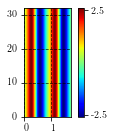

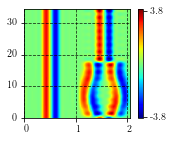

Starting gradient descent. Initial residual=443696.0651763802, target=1.024e-06, max_iter=16384
########## Residual=56.67664813482203 after 1638 gradient descent iterations
########## Residual=22.23403578680716 after 3276 gradient descent iterations
########## Residual=12.629022856371973 after 4914 gradient descent iterations
########## Residual=8.599047588585096 after 6552 gradient descent iterations
########## Residual=6.498713124919416 after 8190 gradient descent iterations
########## Residual=5.246859368359661 after 9828 gradient descent iterations
########## Residual=4.430010029513117 after 11466 gradient descent iterations
########## Residual=3.8616107531262243 after 13104 gradient descent iterations
########## Residual=3.4468941158710162 after 14742 gradient descent iterations
########## Residual=3.133190636867027 after 16380 gradient descent iterations
Starting lstsq. Initial residual=3.132519663262258, target=1.024e-06
3444443332254378888888888Residual=1.2153618395050294 after

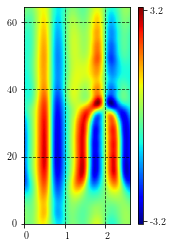

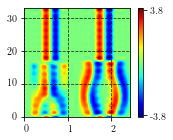

Starting gradient descent. Initial residual=70470.16399542891, target=1.024e-06, max_iter=16384
########## Residual=14.533373125880482 after 1638 gradient descent iterations
########## Residual=5.863614696218117 after 3276 gradient descent iterations
########## Residual=3.279291785372466 after 4914 gradient descent iterations
########## Residual=2.1101399137975383 after 6552 gradient descent iterations
########## Residual=1.4669824074882776 after 8190 gradient descent iterations
########## Residual=1.074601722200852 after 9828 gradient descent iterations
########## Residual=0.8207483481199387 after 11466 gradient descent iterations
########## Residual=0.6496534048323724 after 13104 gradient descent iterations
########## Residual=0.5300872615884202 after 14742 gradient descent iterations
########## Residual=0.4436099965535258 after 16380 gradient descent iterations
Starting lstsq. Initial residual=0.4434291509436587, target=1.024e-06
3543335566666666666677776Residual=0.20233069727037697

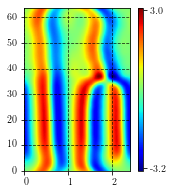

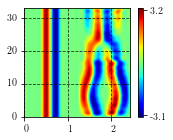

Starting gradient descent. Initial residual=89870.70295307472, target=1.024e-06, max_iter=16384
########## Residual=13.186293449560967 after 1638 gradient descent iterations
########## Residual=4.3545179569929235 after 3276 gradient descent iterations
########## Residual=2.375648401411282 after 4914 gradient descent iterations
########## Residual=1.6122994026512767 after 6552 gradient descent iterations
########## Residual=1.2154448650911112 after 8190 gradient descent iterations
########## Residual=0.9723917930365993 after 9828 gradient descent iterations
########## Residual=0.8083159677584538 after 11466 gradient descent iterations
########## Residual=0.6902742231894755 after 13104 gradient descent iterations
########## Residual=0.6013654362589917 after 14742 gradient descent iterations
########## Residual=0.5319987762592843 after 16380 gradient descent iterations
Starting lstsq. Initial residual=0.5318480248618688, target=1.024e-06
4443444444444444555556667Residual=0.261753955311370

KeyboardInterrupt: 

In [15]:
symbol_arrays = generate_symbol_arrays(td, glue_shape, unique=True)
X = []
symbol_y = []
converge_y = []

for sa in symbol_arrays:
    tiling = tile(sa, td, OrbitKS)
    tiling.plot()
    tiling_converge_result = converge(tiling, verbose=True)
    tiling_converge_result.orbit.plot()
    X.append(tiling_converge_result.orbit.state)
    symbol_counter = Counter(sa.ravel().tolist())
    symbol_y.append([symbol_counter[0], symbol_counter[1], symbol_counter[2]])
    converge_y.append(tiling_converge_result.exit_code)

In [55]:
from orbithunter.discretization import _parameter_based_discretization

In [56]:
rediscretize_tiling_dictionary(td)

{0: OrbitKS({"state_type": "field", "T": "0.e+00", "L": "6.39e+00", "N": "32", "M": "32"}),
 1: OrbitKS({"state_type": "field", "T": "1.59e+01", "L": "1.30e+01", "N": "32", "M": "32"}),
 2: OrbitKS({"state_type": "field", "T": "1.71e+01", "L": "1.76e+01", "N": "32", "M": "32"})}

In [58]:
rediscretize_tiling_dictionary(td, parameter_based=False)

{0: OrbitKS({"state_type": "field", "T": "0.e+00", "L": "6.39e+00", "N": "64", "M": "64"}),
 1: OrbitKS({"state_type": "field", "T": "1.59e+01", "L": "1.30e+01", "N": "64", "M": "64"}),
 2: OrbitKS({"state_type": "field", "T": "1.71e+01", "L": "1.76e+01", "N": "64", "M": "64"})}

In [59]:
rediscretize_tiling_dictionary(td, new_shape=(12, 24))

{0: OrbitKS({"state_type": "field", "T": "0.e+00", "L": "6.39e+00", "N": "12", "M": "24"}),
 1: OrbitKS({"state_type": "field", "T": "1.59e+01", "L": "1.30e+01", "N": "12", "M": "24"}),
 2: OrbitKS({"state_type": "field", "T": "1.71e+01", "L": "1.76e+01", "N": "12", "M": "24"})}